<a href="https://colab.research.google.com/github/Minhaz-04/Minhaz-04/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('/content/disney_plus_titles.csv')

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [39]:
df.shape

(1368, 12)

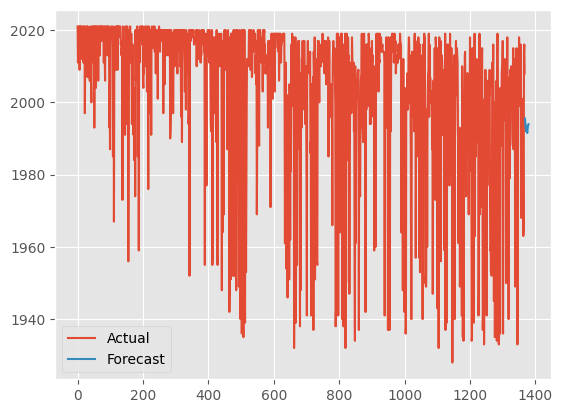

In [40]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['release_year'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()
forecast = results.forecast(steps=12)
plt.plot(df['release_year'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


In [48]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df['text_sentiment'] = df['description'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(df['description'])
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch')
lda.fit(text_features)
for topic_idx, topic in enumerate(lda.components_):
  top_n_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
  print(f"Topic #{topic_idx + 1}: {', '.join(top_n_words)}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Topic #1: the, of, is, to, and, in, an, his, for, on
Topic #2: the, to, and, of, world, with, in, her, their, for
Topic #3: the, for, to, details, advisory, see, of, his, and, in
Topic #4: the, of, to, and, in, for, new, on, an, his
Topic #5: the, and, of, to, in, his, team, as, with, save
Topic #6: the, of, and, to, for, advisory, details, see, an, on
Topic #7: the, and, for, of, see, advisory, details, to, in, his
Topic #8: the, of, and, to, in, disney, from, an, get, out
Topic #9: the, to, of, in, and, is, he, on, for, at
Topic #10: the, to, and, for, of, his, their, advisory, details, see


In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(text_features)
df['cluster'] = kmeans.labels_
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_features, df['cluster'], test_size=0.2, random_state=42)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_matrix}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.948905109489051
Confusion Matrix:
[[149   0   0]
 [ 13  88   0]
 [  0   1  23]]
